In [6]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer
import matplotlib.pyplot as plt
from textblob import TextBlob

In [9]:
stock_data=pd.read_csv(r'C:\Users\vinso\Downloads\hdfc data.csv')
stock_data


,Date,Price,Open,High,Low,Volume,Reviews
0,26/10/23,1463.40,1491.25,1492.00,1460.25,27780899,This Product is Excellent!
1,25/10/23,1496.50,1521.00,1522.80,1491.45,14155998,The packaging is just average
2,23/10/23,1506.05,1523.50,1528.75,1500.10,11188068,The packaging is just average
3,20/10/23,1522.80,1505.00,1527.00,1505.00,10547005,The packaging is just average
4,19/10/23,1514.95,1505.40,1526.25,1503.20,15126182,This Product is Excellent!
...,...,...,...,...,...,...,...
495,27/10/21,1642.80,1652.75,1665.05,1637.30,6624821,The customer service was terrible
496,26/10/21,1652.75,1650.00,1673.85,1646.35,6045328,The customer service was terrible
497,25/10/21,1657.00,1690.00,1690.00,1613.80,8213383,The packaging is just average
498,22/10/21,1680.75,1680.10,1708.00,1670.75,6087777,The packaging is just average


In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(stock_data['Reviews'])

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, stock_data['Volume'], test_size=0.2, random_state=42)


In [12]:
# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Predict sentiment labels on the test data
y_pred = random_forest.predict(X_test)

In [20]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [21]:
stock_data['Sentiment'] = stock_data['Reviews'].apply(analyze_sentiment)



In [22]:
print(stock_data[['Date', 'Reviews', 'Sentiment']])


         Date                            Reviews Sentiment
0    26/10/23         This Product is Excellent!  positive
1    25/10/23      The packaging is just average   neutral
2    23/10/23      The packaging is just average   neutral
3    20/10/23      The packaging is just average   neutral
4    19/10/23         This Product is Excellent!  positive
..        ...                                ...       ...
495  27/10/21  The customer service was terrible  negative
496  26/10/21  The customer service was terrible  negative
497  25/10/21      The packaging is just average   neutral
498  22/10/21      The packaging is just average   neutral
499  21/10/21  The customer service was terrible  negative

[500 rows x 3 columns]


In [23]:
dates = pd.to_datetime(stock_data['Date'])
close_prices = stock_data['Reviews']


C:\Users\vinso\AppData\Local\Temp\ipykernel_17460\4256776610.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(stock_data['Date'])


In [27]:
stock_data

,Date,Price,Open,High,Low,Volume,Reviews,Sentiment
0,26/10/23,1463.40,1491.25,1492.00,1460.25,27780899,This Product is Excellent!,positive
1,25/10/23,1496.50,1521.00,1522.80,1491.45,14155998,The packaging is just average,neutral
2,23/10/23,1506.05,1523.50,1528.75,1500.10,11188068,The packaging is just average,neutral
3,20/10/23,1522.80,1505.00,1527.00,1505.00,10547005,The packaging is just average,neutral
4,19/10/23,1514.95,1505.40,1526.25,1503.20,15126182,This Product is Excellent!,positive
...,...,...,...,...,...,...,...,...
495,27/10/21,1642.80,1652.75,1665.05,1637.30,6624821,The customer service was terrible,negative
496,26/10/21,1652.75,1650.00,1673.85,1646.35,6045328,The customer service was terrible,negative
497,25/10/21,1657.00,1690.00,1690.00,1613.80,8213383,The packaging is just average,neutral
498,22/10/21,1680.75,1680.10,1708.00,1670.75,6087777,The packaging is just average,neutral


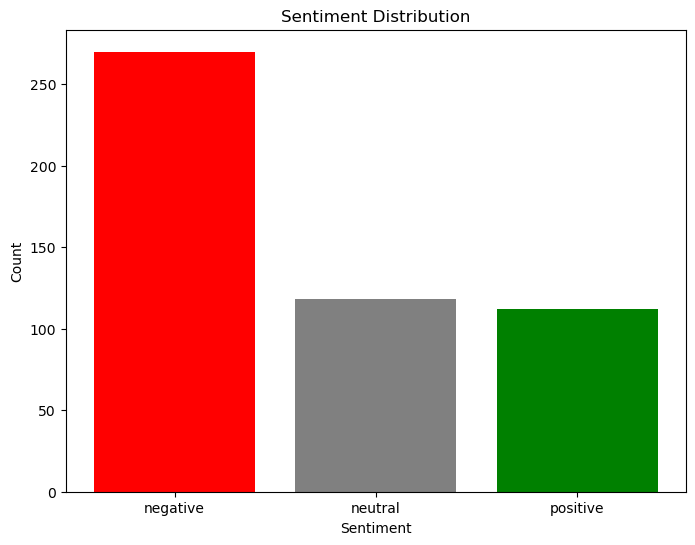

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming the 'Sentiment' column contains sentiment labels

# Count the occurrences of each sentiment
sentiment_counts = stock_data['Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'grey', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
